This notebook aims to explore the data 1 for news scoring

In [1]:
import pandas as pd
import logging
import dvc.api
import os
import sys
import string
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

sys.path.append(os.path.abspath(os.path.join("../scripts")))

import load_data


In [2]:
logging.basicConfig(filename='../data1Exploration.log', filemode='a',
                    encoding='utf-8', level=logging.DEBUG)

In [3]:
data = load_data.load_excel_file('data/Example_data.xlsx', './', 'Sv1')

In [4]:
data

,Domain,Title,Description,Body,Link,timestamp,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,0.00,4,1.96
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,0.00,4,12.00
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,0.00,4,0.05
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,0.00,4,6.10
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,0.00,4,0.13
5,mype.co.za,Male arrested for the murder of an elderly fem...,…Crime Stamp Out…N1 and R101 roads appear in c...,South African Police Service Office of the Pro...,https://mype.co.za/new/male-arrested-for-the-m...,2021-09-10T00:17:46.055622,1.33,2,11.00
6,eminetra.co.za,7th Anniversary of SCOAN Collapse in Nigeria-S...,"…in Lagos, Nigeria, 84 South Africans were kil...",Today is the 7th anniversary [Tragic collapse ...,https://eminetra.co.za/7th-anniversary-of-scoa...,2021-09-12T05:17:50.279081,0.00,4,10.10
7,eminetra.co.za,The construction sector is expected to be boos...,"…additional spending on buildings, repairs and...",Construction activity grew steadily by 4% in t...,https://eminetra.co.za/the-construction-sector...,2021-09-09T09:02:46.320793,1.66,1,1.36
8,news24.com,News24.com | Court dismisses attempt by former...,…Lawsuit Against Public Participation) designe...,- Former Eskom CEO Matshela Moses Koko sought ...,https://www.news24.com/news24/southafrica/news...,2021-09-09T19:32:46.239682,0.33,3,2.40
9,manometcurrent.com,Global and Regional Beta-Carotene Market Resea...,…key players! – DSM – BASF – Allied Biotech – ...,Global and Regional Beta-Carotene Market Resea...,https://manometcurrent.com/global-and-regional...,2021-09-13T03:02:45.609228,0.00,4,0.22


The data currently contains 9 records. It will surely grow up.

## Fields description
**Domain** - the base URL or a reference to the source these item comes from  
**Title** - title of the item - the content of the item  
**Description** - the content of the item  
**Body** - the content of the item  
**Link** - URL to the item source (it may not functional anymore sometime)  
**Timestamp** - timestamp that this item was collected at  
**Analyst_Average_Score** -  target variable - the score to be estimated   
**Analyst_Rank** - score as rank  
**Reference_Final_Score** - Not relevant for now - it is a transformed quantity  


In [5]:
data.columns

Index(['Domain', 'Title', 'Description', 'Body', 'Link', 'timestamp',
       'Analyst_Average_Score', 'Analyst_Rank', 'Reference_Final_Score'],
      dtype='object')

In [6]:
data.info

<bound method DataFrame.info of                        Domain  \
0         rassegnastampa.news   
1                 twitter.com   
2             atpe-tchad.info   
3  badbluetech.bitnamiapp.com   
4           kryptogazette.com   
5                  mype.co.za   
6              eminetra.co.za   
7              eminetra.co.za   
8                  news24.com   
9          manometcurrent.com   

                                               Title  \
0  Boris Johnson using a taxpayer-funded jet for ...   
1  Stumbled across an interesting case, a woman f...   
2  Marché Résines dans les peintures et revêtemen...   
3        AI drives data analytics surge, study finds   
4  Triacetin Vertrieb Markt 2021: Globale Unterne...   
5  Male arrested for the murder of an elderly fem...   
6  7th Anniversary of SCOAN Collapse in Nigeria-S...   
7  The construction sector is expected to be boos...   
8  News24.com | Court dismisses attempt by former...   
9  Global and Regional Beta-Carotene Market 

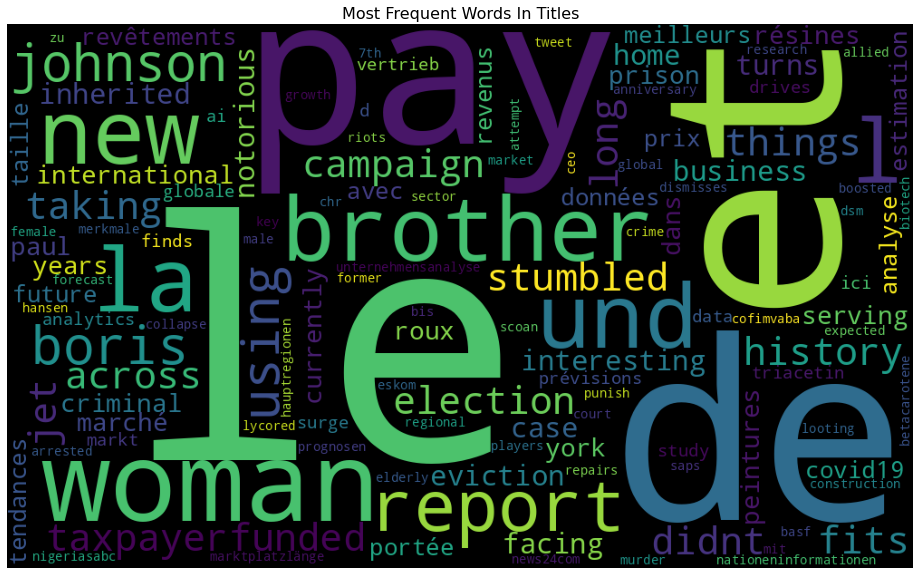

In [8]:
# retain only english tweets
visualize_df = data.copy()

#text Preprocessing
visualize_df['Title'] = visualize_df['Title'].astype(str)
visualize_df['Title'] = visualize_df['Title'].apply(lambda x: x.lower())
visualize_df['Title'] = visualize_df['Title'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000, height=600, stopwords=STOPWORDS).generate(' '.join(visualize_df.Title.values)))
plt.axis('off')
plt.title('Most Frequent Words In Titles',fontsize=16)
plt.savefig('../images/Frequent_Words_In_Titles')


Most frequent words in Titkes are: PAY - WOMAN - REPORT - BROTHER

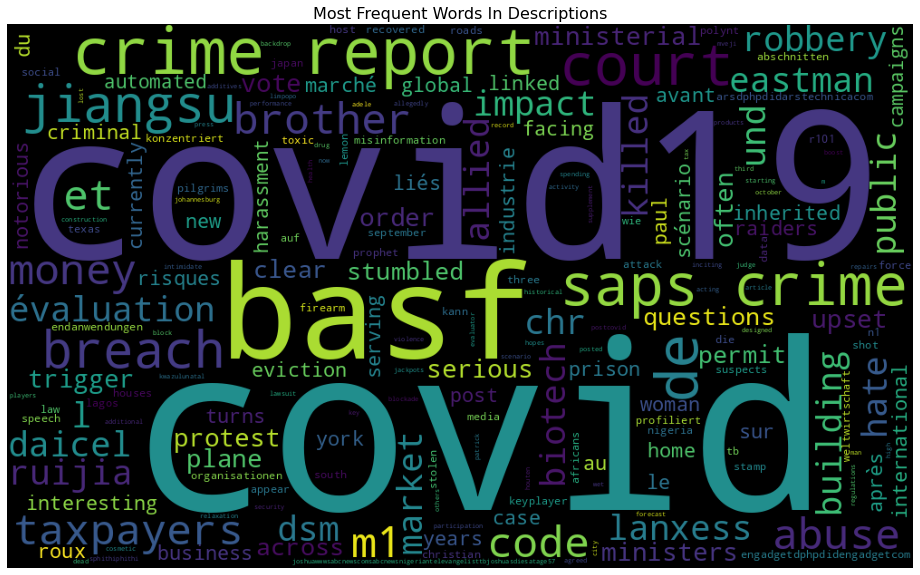

In [9]:
# retain only english tweets
visualize_df = data.copy()

#text Preprocessing
visualize_df['Description'] = visualize_df['Description'].astype(str)
visualize_df['Description'] = visualize_df['Description'].apply(lambda x: x.lower())
visualize_df['Description'] = visualize_df['Description'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000, height=600, stopwords=STOPWORDS).generate(' '.join(visualize_df.Description.values)))
plt.axis('off')
plt.title('Most Frequent Words In Descriptions',fontsize=16)
plt.savefig('../images/Frequent_Words_In_Descriptions')


Most frequent words in Description are: COVID19 - CRIME - REPORT

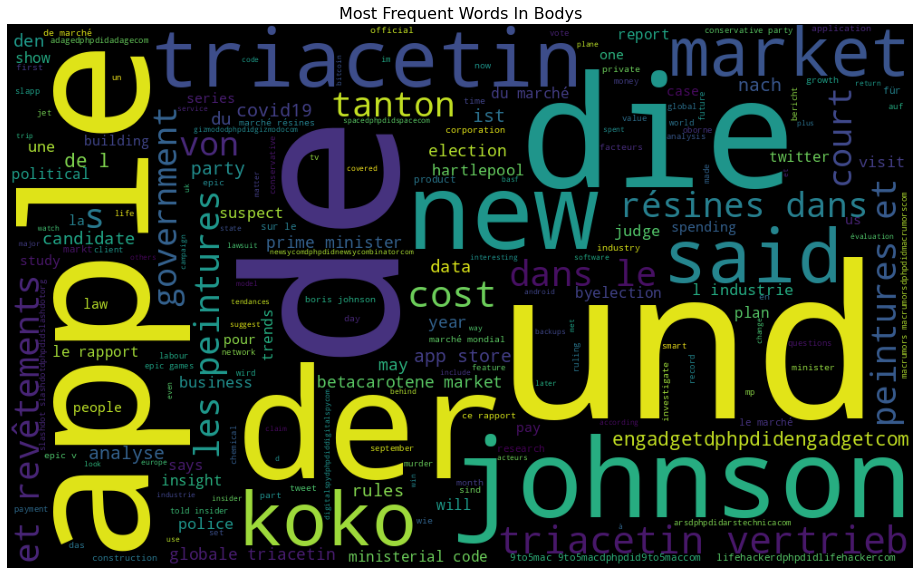

In [10]:
# retain only english tweets
visualize_df = data.copy()

#text Preprocessing
visualize_df['Body'] = visualize_df['Body'].astype(str)
visualize_df['Body'] = visualize_df['Body'].apply(lambda x: x.lower())
visualize_df['Body'] = visualize_df['Body'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000, height=600, stopwords=STOPWORDS).generate(' '.join(visualize_df.Body.values)))
plt.axis('off')
plt.title('Most Frequent Words In Bodys',fontsize=16)
plt.savefig('../images/Frequent_Words_In_Bodys')


Most frequent words in Body are: APPLE - JOHNSON - DIE

### Scores overview

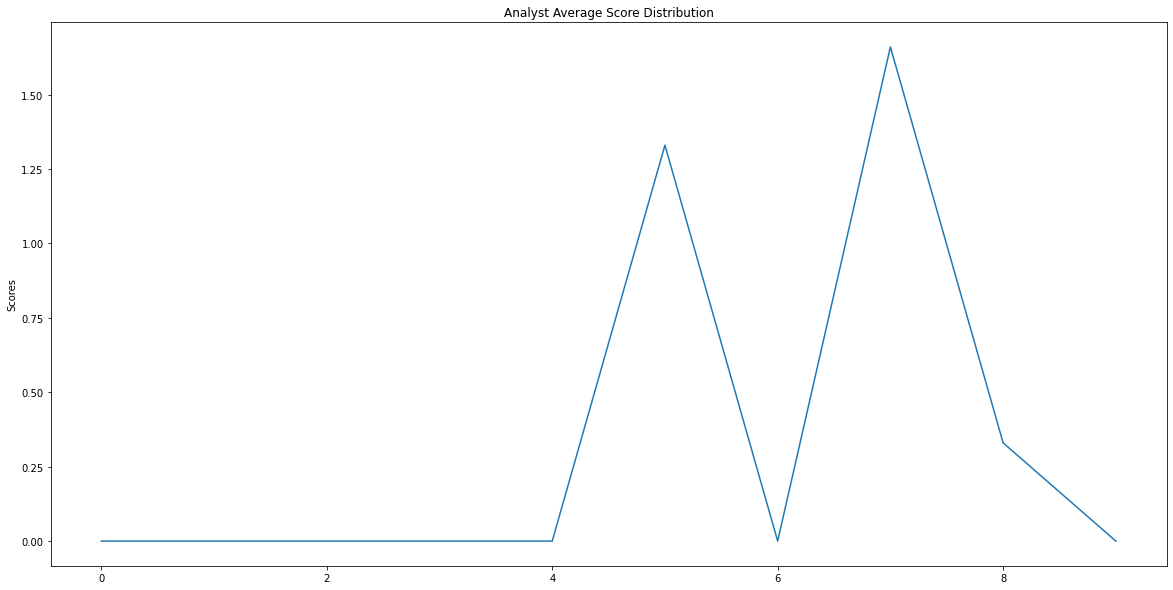

In [11]:
plt.figure(figsize=(20,10))
plt.plot(data['Analyst_Average_Score'])
plt.title('Analyst Average Score Distribution')
plt.ylabel('Scores')
plt.savefig('../images/Analyst_Average_Score.png')

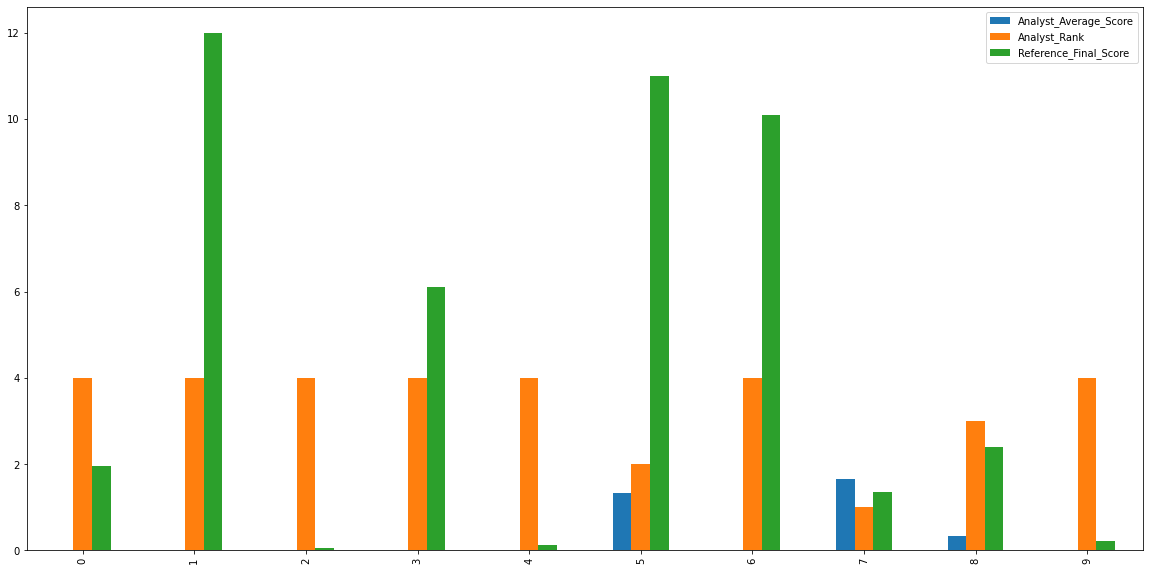

In [12]:
data.plot(kind='bar', figsize=(20,10))
plt.savefig('../images/Scores_plot.png')